# Shi 2020 (pyQuil)

In [7]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
from numpy import sin,cos,exp,sqrt
from pyquil import Program
from pyquil.quil import DefGate
from pyquil.gates import *
from pyquil.api import WavefunctionSimulator
from pyquil.quil import Pragma, Program
from pyquil.api import get_qc
from pyquil.gates import CNOT, H
import matplotlib.pyplot as plt
wf_sim = WavefunctionSimulator()

In [2]:
# define time evolution operator
def getU(tau,theta,s):
    # define U gate
    U = np.zeros((4,4))

    U[0,0] = (s+(-1+s)*cos(sqrt(-2+4*s)*tau))/(-1+2*s)

    U[0,1] = (sqrt(-1+s)*(-1j*cos(theta)+sin(theta))*sin(sqrt(-2+4*s)*tau))/sqrt(-1+2*s)

    U[0,2] = -( 2*exp(2*1j*theta)*sqrt(-1+s)*sqrt(s)*sin(sqrt(-0.5+2)*tau)**2 )/(-1+2*s)

    U[1,0] = (sqrt(-1+s)*(-1j*cos(theta)-sin(theta))*sin(sqrt(-2+4*s)*tau))/sqrt(-1+2*s)

    U[1,1] = cos(sqrt(-2+4*s)*tau)

    U[1,2] = sqrt(s)*(-1j*cos(theta)+sin(theta))*sin(sqrt(-2+4*s)*tau)/sqrt(-1+2*s)

    U[2,0] = -( 2*exp(-2*1j*theta)*sqrt(-1+s)*sqrt(s)*sin(sqrt(-0.5+2)*tau)**2 )/(-1+2*s)

    U[2,1] = sqrt(s)*(-1j*cos(theta)-sin(theta))*sin(sqrt(-2+4*s)*tau)/sqrt(-1+2*s)

    U[2,2] = (-1+s+s*cos(sqrt(-2+4*s)*tau))/(-1+2*s)

    U[3,3] = 1
    return U

In [24]:
# Then we can use the new gate
p = Program()

# tau can take arbitrary value, but not theta
Ugate_mat = getU(0.2,np.pi/2,2).copy()

#Ugate_mat = np.array([[0.9607936273555613,0.2716639952608249,5.544618392521859e-2,0],[-0.2716639952608249,0.8823808820666842,0.3841909065063188,0],[5.544618392521859e-2,-0.3841909065063188,0.9215872547111227,0],[0,0,0,1.00000000000000000000000000000]])

Ugate_definition = DefGate("U", Ugate_mat)
Ugate = Ugate_definition.get_constructor()

# Then we can use the new gate
p = Program(Ugate_definition, Ugate(0, 1))

print(p)

DEFGATE U:
    0.9607936273555614, 0.2716639952608249, 0.05544618392521859, 0
    -0.2716639952608249, 0.8823808820666842, 0.3841909065063188, 0
    0.05544618392521859, -0.3841909065063188, 0.9215872547111227, 0
    0, 0, 0, 1.0

U 0 1



In [25]:
qc = get_qc("9q-square-qvm")

ep = qc.compile(p)

print(ep.program) # here ep is of type PyquilExecutableResponse, which is not always i

U
[[0.9607936273555614, 0.2716639952608249, 0.05544618392521859, 0.0], [-0.2716639952608249, 0.8823808820666842, 0.3841909065063188, 0.0], [0.05544618392521859, -0.3841909065063188, 0.9215872547111227, 0.0], [0.0, 0.0, 0.0, 1.0]]
DEFGATE U:
    0.9607936273555614, 0.2716639952608249, 0.05544618392521859, 0
    -0.2716639952608249, 0.8823808820666842, 0.3841909065063188, 0
    0.05544618392521859, -0.3841909065063188, 0.9215872547111227, 0
    0, 0, 0, 1.0

RZ(-pi) 0
RX(pi/2) 0
RZ(2.186276035465283) 0
RX(-pi/2) 0
RZ(-pi) 1
RX(pi/2) 1
RZ(1.7141260552949018) 1
RX(-pi/2) 1
RZ(-pi) 1
CZ 1 0
RX(pi/2) 0
RZ(0.39864643091397767) 0
RX(-pi/2) 0
RX(pi/2) 1
RZ(0.4898979485566349) 1
RX(-pi/2) 1
CZ 1 0
RZ(pi) 0
RX(pi/2) 0
RZ(2.1862760354652844) 0
RX(-pi/2) 0
RX(pi/2) 1
RZ(1.4274665982948875) 1
RX(-pi/2) 1
HALT



In [26]:
# 
tdim = 100
# occupation coefficients
alpha0 = np.zeros(tdim)
alpha1 = np.zeros(tdim)
alpha2 = np.zeros(tdim)
# evolve state in time
for t in range(tdim):
    # run circuit 1 time step
    wavefunction = wf_sim.wavefunction(p)
    amps=wavefunction.amplitudes
    
    alpha0[t] = np.abs(amps[0])**2
    alpha1[t] = np.abs(amps[2])**2
    alpha2[t] = np.abs(amps[1])**2
    p += Ugate(0,1)
# instead of saving the amplitude^2
# we could have saved the entire wavefunction

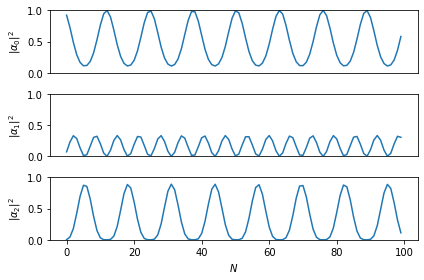

In [27]:
# plot reproducing FIG2
plt.subplot(311)
plt.plot(alpha0)
plt.ylim([0,1])
plt.xticks([])
plt.ylabel(r'$|\alpha_0|^2$')

plt.subplot(312)
plt.plot(alpha1)
plt.ylim([0,1])
plt.xticks([])
plt.ylabel(r'$|\alpha_1|^2$')

plt.subplot(313)
plt.plot(alpha2)
plt.ylim([0,1])
plt.xlabel(r'$N$')
plt.ylabel(r'$|\alpha_2|^2$')

plt.tight_layout()
plt.show()